Enter the full path to your Excel file containing daily returns:  \Users\Mattia\Desktop\P.Capitals Exam\Returns.xlsx


Enter the weights for the portfolio (they must sum to 1):


Weight for TSM:  0.1
Weight for AMZN:  0.1
Weight for NVDA:  0.2
Weight for BRK.B:  0.2
Weight for REY:  0.2
Weight for STLAM:  0.2
Enter the confidence level for VaR (e.g., 0.95 for 95%):  0.95


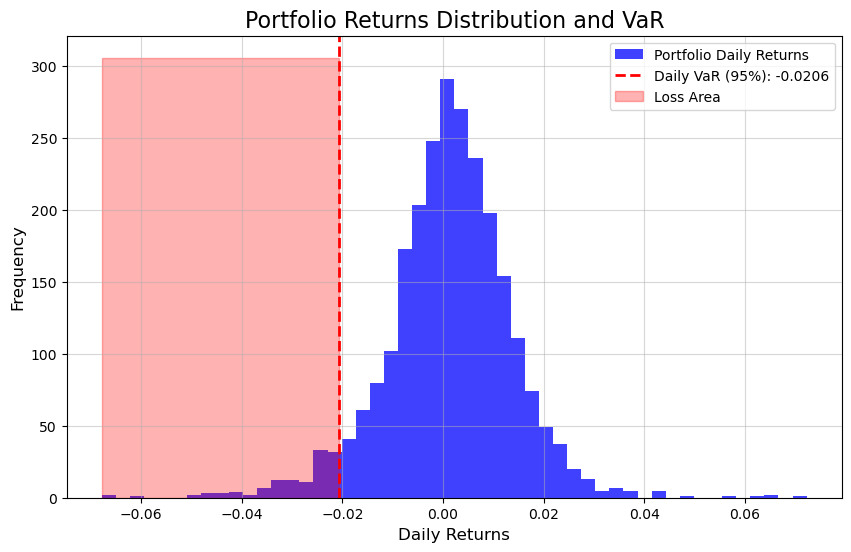

The Annualized Value at Risk (VaR) of your portfolio is: -0.3270


In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_var(file_path, weights, confidence_level=0.95, plot_graph=True):
    """
    Calculate the Value at Risk (VaR) of a portfolio using the parametric approach,
    with annualized returns and standard deviation, and plot the result.

    Parameters:
        file_path (str): Path to the Excel file containing daily returns of securities.
        weights (list): Portfolio weights for each security.
        confidence_level (float): Confidence level for VaR calculation.
        plot_graph (bool): If True, displays a graphical representation of VaR.
        
    Returns:
        float: The Value at Risk (VaR) of the portfolio (annualized).
    """
    # Load Excel file, skipping the first row and column
    daily_returns = pd.read_excel(file_path, header=1, index_col=0)
    
    # Ensure weights are in the correct format
    weights = np.array(weights)
    
    # Extract daily returns only (exclude the Date column)
    daily_returns = daily_returns.iloc[:, 1:]
    
    # Calculate portfolio returns
    portfolio_returns = daily_returns.dot(weights)
    
    # Mean and standard deviation of portfolio returns (daily)
    daily_mean_return = portfolio_returns.mean()
    daily_std_dev = portfolio_returns.std()
    
    # Annualize mean return and standard deviation
    trading_days = 252  # Assume 252 trading days in a year
    annualized_mean_return = daily_mean_return * trading_days
    annualized_std_dev = daily_std_dev * np.sqrt(trading_days)
    
    # Z-score for the specified confidence level
    z_score = abs(np.percentile(np.random.normal(0, 1, 100000), 100 * (1 - confidence_level)))
    
    # Calculate Value at Risk (annualized)
    var = z_score * annualized_std_dev
    
    # Plotting the results if required
    if plot_graph:
        plt.figure(figsize=(10, 6))
        # Plot the histogram of portfolio daily returns
        plt.hist(portfolio_returns, bins=50, alpha=0.75, label='Portfolio Daily Returns', color='blue')
        
        # Add a vertical line for VaR
        plt.axvline(-var / np.sqrt(trading_days), color='red', linestyle='dashed', linewidth=2,
                    label=f'Daily VaR ({confidence_level*100:.0f}%): {-var / np.sqrt(trading_days):.4f}')
        
        # Shade the area under the VaR threshold
        plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=-var / np.sqrt(trading_days),
                          x2=min(portfolio_returns), color='red', alpha=0.3, label='Loss Area')
        
        # Titles and labels
        plt.title('Portfolio Returns Distribution and VaR', fontsize=16)
        plt.xlabel('Daily Returns', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend()
        plt.grid(alpha=0.5)
        plt.show()
    
    return var

def calculate_var_with_input():
    """
    Prompts user for the file path and calculates the Value at Risk (VaR) of a portfolio.
    """
    # Prompt user for file path and validate existence
    file_path = input("Enter the full path to your Excel file containing daily returns: ")
    if not os.path.exists(file_path):
        print("File not found. Please check the path and try again.")
        return
    
    # Load Excel file to retrieve tickers
    try:
        daily_returns = pd.read_excel(file_path, header=1, index_col=0)
        tickers = daily_returns.columns[1:]  # Exclude the 'Date' column
    except Exception as e:
        print(f"Error loading file: {e}")
        return
    
    # Prompt for weights for each ticker
    weights = []
    print("Enter the weights for the portfolio (they must sum to 1):")
    for ticker in tickers:
        weight = float(input(f"Weight for {ticker}: "))
        weights.append(weight)
    
    # Validate that weights sum to 1
    if not np.isclose(sum(weights), 1):
        print(f"Error: Weights do not sum to 1 (total: {sum(weights):.2f}). Please try again.")
        return
    
    # Prompt for confidence level
    confidence_level = float(input("Enter the confidence level for VaR (e.g., 0.95 for 95%): "))
    
    # Call the calculate_var function
    try:
        var = calculate_var(file_path, weights, confidence_level, plot_graph=True)
        print(f"The Annualized Value at Risk (VaR) of your portfolio is: {-var:.4f}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the function
calculate_var_with_input()




Enter the full path to your Excel file containing daily returns:  \Users\Mattia\Desktop\P.Capitals Exam\Returns.xlsx


Enter the weights for the portfolio (they must sum to 1):


Weight for TSM:  0.1
Weight for AMZN:  0.1
Weight for NVDA:  0.2
Weight for BRK.B:  0.2
Weight for REY:  0.2
Weight for STLAM:  0.2
Enter the confidence level for CVaR (e.g., 0.95 for 95%):  0.95


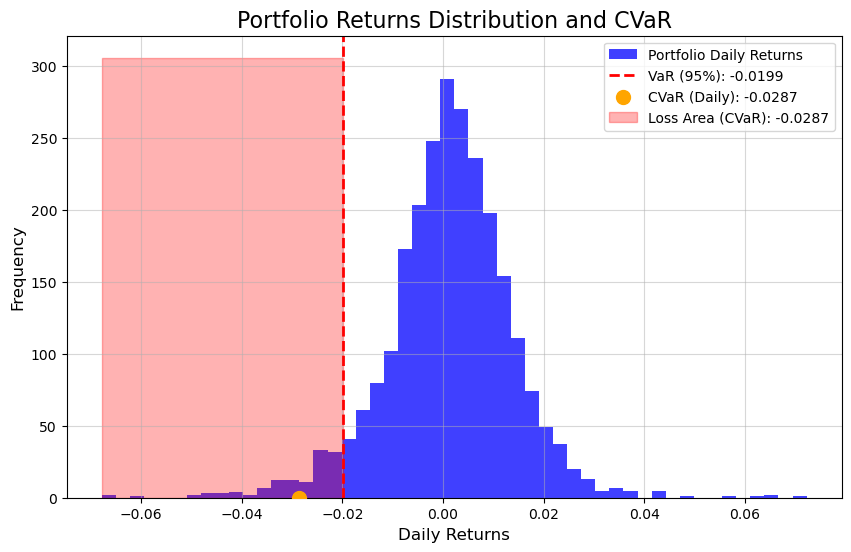

The Annualized Conditional Value at Risk (CVaR) of your portfolio is: -0.4558


In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_cvar(file_path, weights, confidence_level=0.95, plot_graph=True):
    """
    Calculate the Conditional Value at Risk (CVaR) of a portfolio using historical returns,
    with annualized returns and standard deviation, and plot the result.

    Parameters:
        file_path (str): Path to the Excel file containing daily returns of securities.
        weights (list): Portfolio weights for each security.
        confidence_level (float): Confidence level for CVaR calculation.
        plot_graph (bool): If True, displays a graphical representation of CVaR.
        
    Returns:
        float: The Conditional Value at Risk (CVaR) of the portfolio (annualized).
    """
    # Load Excel file, skipping the first row and column
    daily_returns = pd.read_excel(file_path, header=1, index_col=0)
    
    # Ensure weights are in the correct format
    weights = np.array(weights)
    
    # Extract daily returns only (exclude the Date column)
    daily_returns = daily_returns.iloc[:, 1:]
    
    # Calculate portfolio returns
    portfolio_returns = daily_returns.dot(weights)
    
    # Calculate the VaR threshold
    var_threshold = np.percentile(portfolio_returns, (1 - confidence_level) * 100)
    
    # Filter returns that are below the VaR threshold
    tail_losses = portfolio_returns[portfolio_returns <= var_threshold]
    
    # Calculate CVaR as the mean of the tail losses
    daily_cvar = tail_losses.mean()
    
    # Annualize CVaR
    trading_days = 252  # Assume 252 trading days in a year
    annualized_cvar = daily_cvar * np.sqrt(trading_days)
    
    # Plotting the results if required
    if plot_graph:
        plt.figure(figsize=(10, 6))
        # Plot the histogram of portfolio daily returns
        plt.hist(portfolio_returns, bins=50, alpha=0.75, label='Portfolio Daily Returns', color='blue')
        
        # Add a vertical line for VaR
        plt.axvline(var_threshold, color='red', linestyle='dashed', linewidth=2,
                    label=f'VaR ({confidence_level*100:.0f}%): {var_threshold:.4f}')
        
        # Mark the CVaR daily point on the graph
        plt.scatter([daily_cvar], [0], color='orange', s=100, zorder=5, label=f'CVaR (Daily): {daily_cvar:.4f}')
        
        # Shade the area under the CVaR threshold
        plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=min(portfolio_returns), x2=var_threshold,
                          color='red', alpha=0.3, label=f'Loss Area (CVaR): {daily_cvar:.4f}')
        
        # Titles and labels
        plt.title('Portfolio Returns Distribution and CVaR', fontsize=16)
        plt.xlabel('Daily Returns', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend()
        plt.grid(alpha=0.5)
        plt.show()
    
    return annualized_cvar

def calculate_cvar_with_input():
    """
    Prompts user for the file path and calculates the Conditional Value at Risk (CVaR) of a portfolio.
    """
    # Prompt user for file path and validate existence
    file_path = input("Enter the full path to your Excel file containing daily returns: ")
    if not os.path.exists(file_path):
        print("File not found. Please check the path and try again.")
        return
    
    # Load Excel file to retrieve tickers
    try:
        daily_returns = pd.read_excel(file_path, header=1, index_col=0)
        tickers = daily_returns.columns[1:]  # Exclude the 'Date' column
    except Exception as e:
        print(f"Error loading file: {e}")
        return
    
    # Prompt for weights for each ticker
    weights = []
    print("Enter the weights for the portfolio (they must sum to 1):")
    for ticker in tickers:
        weight = float(input(f"Weight for {ticker}: "))
        weights.append(weight)
    
    # Validate that weights sum to 1
    if not np.isclose(sum(weights), 1):
        print(f"Error: Weights do not sum to 1 (total: {sum(weights):.2f}). Please try again.")
        return
    
    # Prompt for confidence level
    confidence_level = float(input("Enter the confidence level for CVaR (e.g., 0.95 for 95%): "))
    
    # Call the calculate_cvar function
    try:
        cvar = calculate_cvar(file_path, weights, confidence_level, plot_graph=True)
        print(f"The Annualized Conditional Value at Risk (CVaR) of your portfolio is: {cvar:.4f}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the function
calculate_cvar_with_input()


